### 1 import libraries

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar
from datetime import datetime

### 2- Télécharger le dataset

In [0]:
#taxi_zone = pd.read_csv("taxi-zone-lookup.csv")
uber_apr = pd.read_csv("uber-raw-data-apr14.csv")
#uber_aug = pd.read_csv("uber-raw-data-aug14.csv")
#uber_janjun = pd.read_csv("uber-raw-data-janjune-15.csv")
#uber_jull = pd.read_csv("uber-raw-data-jul14.csv")
#uber_jun = pd.read_csv("uber-raw-data-jun14.csv")
#uber_may = pd.read_csv("uber-raw-data-may14.csv")
#uber_sep = pd.read_csv("uber-raw-data-sep14.csv")

In [0]:
#taxi_zone.tail()

In [0]:
#uber_janjun.tail()

### 3-  Preprocessing 

In [8]:
uber_apr.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [0]:
#uber_apr["Date/Time"] = uber_apr["Date/Time"].map(pd.to_datetime)
uber_apr['Date/Time'] = pd.to_datetime(uber_apr['Date/Time'], format="%m/%j/%Y %H:%M:%S")

In [73]:

uber_apr.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-01-30 23:22:00,40.7640,-73.9744,B02764,30,3,23
564512,2014-01-30 23:26:00,40.7629,-73.9672,B02764,30,3,23
564513,2014-01-30 23:31:00,40.7443,-73.9889,B02764,30,3,23
564514,2014-01-30 23:32:00,40.6756,-73.9405,B02764,30,3,23
564515,2014-01-30 23:48:00,40.6880,-73.9608,B02764,30,3,23


In [0]:
def get_dom(dt):
    return dt.day
def get_weekday(dt):
    return dt.weekday()
def get_hour(dt):
    return dt.hour

In [0]:
uber_apr["dom"] = uber_apr["Date/Time"].map(get_dom)
uber_apr["weekday"] = uber_apr["Date/Time"].map(get_weekday)
uber_apr["hour"] = uber_apr["Date/Time"].map(get_hour)

In [13]:
uber_apr.head()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-01-01 00:11:00,40.7690,-73.9549,B02512,1,2,0
1,2014-01-01 00:17:00,40.7267,-74.0345,B02512,1,2,0
2,2014-01-01 00:21:00,40.7316,-73.9873,B02512,1,2,0
3,2014-01-01 00:28:00,40.7588,-73.9776,B02512,1,2,0
4,2014-01-01 00:33:00,40.7594,-73.9722,B02512,1,2,0


### 4-  Analyses

Text(0.5, 1.0, 'Fequency by DoM -- uber-raw-data-apr14')

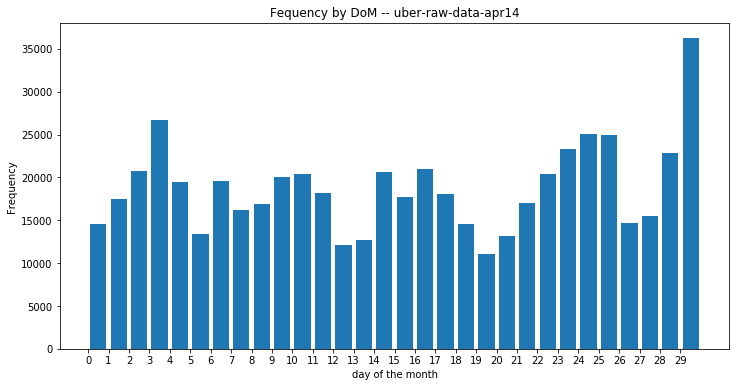

In [14]:
plt.figure(figsize=(12,6))
plt.hist(uber_apr.dom, bins =30, range = (1, 31), rwidth = 0.8)
plt.xticks(range(1,31), uber_apr.dom.index)
plt.xlabel("day of the month")
plt.ylabel("Frequency")
plt.title("Fequency by DoM -- uber-raw-data-apr14")

In [0]:
by_date = uber_apr.groupby("dom").apply(lambda x: len(x))

In [0]:
by_date_sorted = by_date.sort_values()

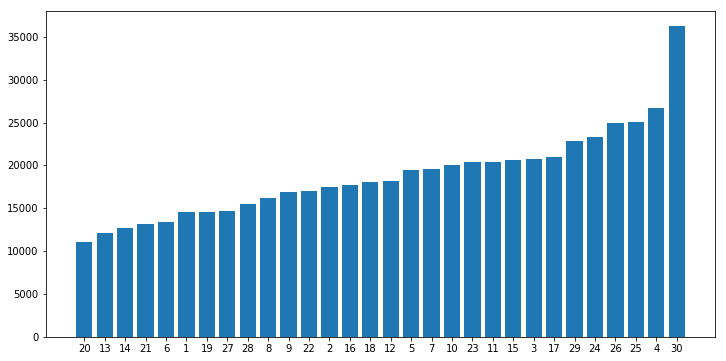

In [17]:
plt.figure(figsize=(12,6))
plt.bar( range(1, 31), by_date_sorted )
plt.xticks(range(1,31), by_date_sorted.index)
plt.show()

Text(0.5, 1.0, 'Fequency by Hour -- uber-raw-data-apr14')

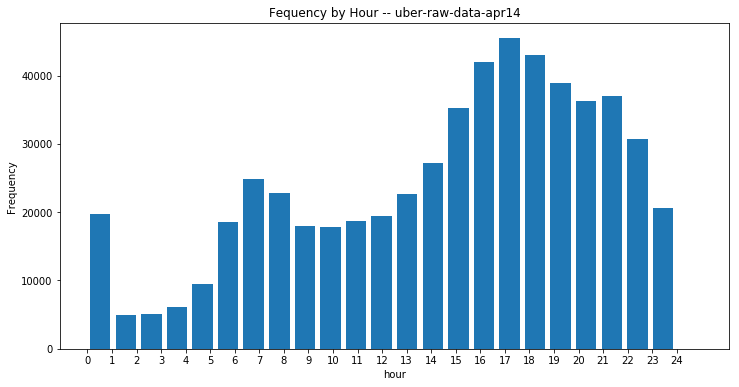

In [18]:
plt.figure(figsize=(12,6))
plt.hist(uber_apr.hour, bins = 24, range = (0, 25), rwidth = 0.8)
plt.xticks(range(0,25), uber_apr.hour.index)
plt.xlabel("hour")
plt.ylabel("Frequency")
plt.title("Fequency by Hour -- uber-raw-data-apr14")

Text(0.5, 1.0, 'Fequency by weekday -- uber-raw-data-apr14')

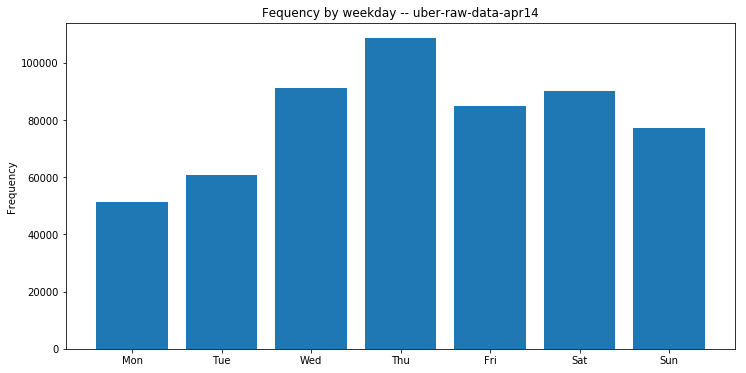

In [19]:
plt.figure(figsize=(12,6))
plt.hist(uber_apr.weekday, bins = 7, range = (-0.5, 6.5), rwidth = 0.8)
plt.xticks(range(7), "Mon Tue Wed Thu Fri Sat Sun".split())
plt.ylabel("Frequency")
plt.title("Fequency by weekday -- uber-raw-data-apr14")


In [0]:
by_weekday_hour = uber_apr.groupby("weekday hour".split()).apply(lambda x :len(x))

In [21]:
corr_weekday_hour = by_weekday_hour.unstack()
corr_weekday_hour

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,,,,
0,4542,2936,1590,1052,685,593,669,873,1233,1770,2113,2360,2478,2763,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018
1,518,261,238,571,1021,1619,2974,3888,3138,2211,1953,1929,1945,2294,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
2,765,367,304,516,887,1734,3766,5304,4594,2962,2900,2949,2819,3556,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
3,899,507,371,585,1003,1990,4230,5647,5242,3846,3844,3889,3988,4469,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
4,792,459,342,567,861,1454,3179,4159,3616,2654,2370,2516,2657,3301,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
5,1367,760,513,736,932,1382,2836,3943,3648,2732,2599,2816,2978,3535,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
6,3027,2479,1577,1013,706,704,844,1110,1372,1764,2086,2315,2560,2685,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719


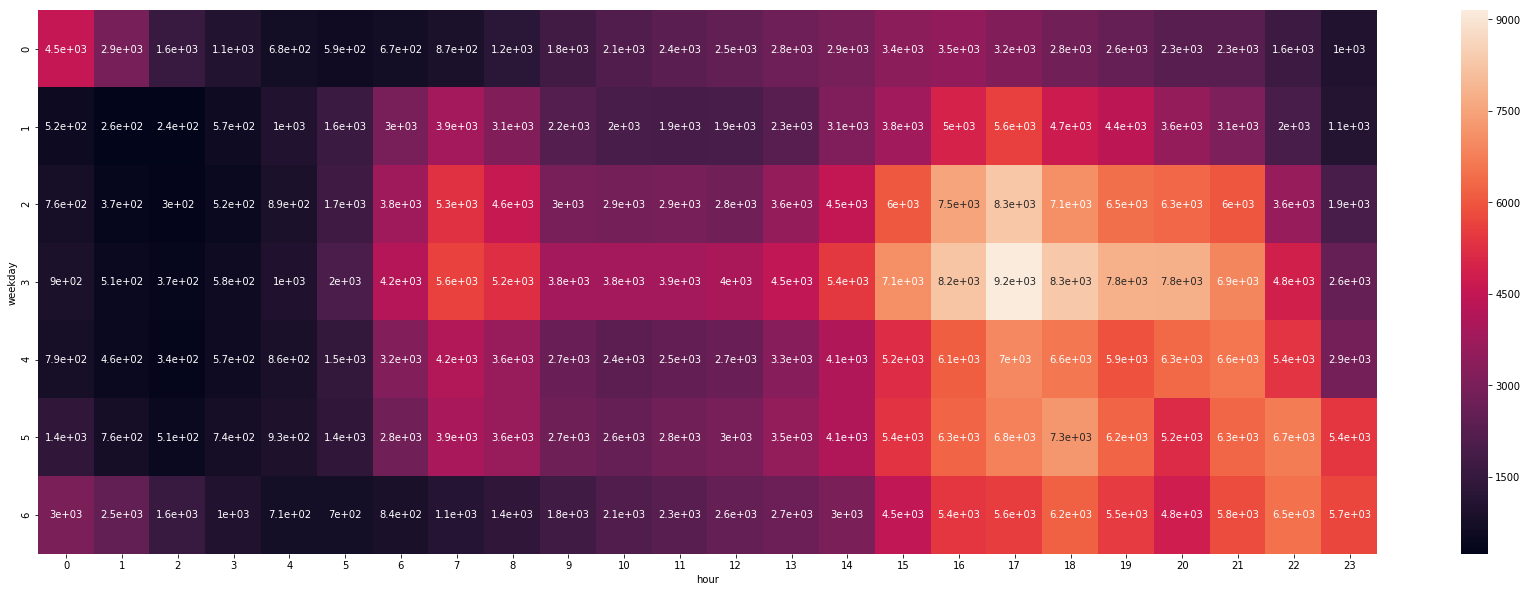

In [22]:
plt.subplots(figsize=(30, 10));
sns.heatmap(corr_weekday_hour, annot=True)

### - Pour Lat

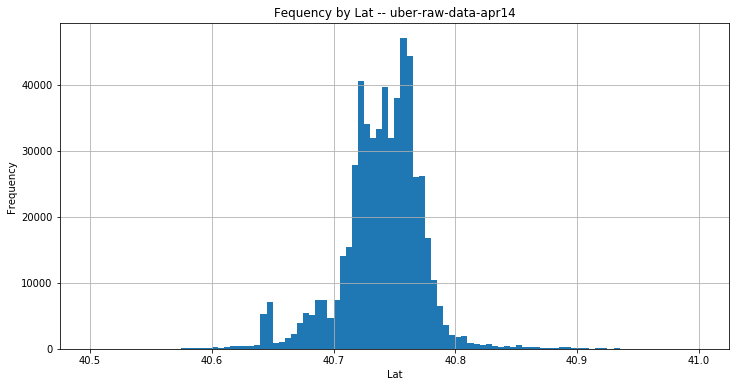

In [23]:
plt.figure(figsize=(12,6))
plt.hist(uber_apr.Lat, bins = 100, range = (40.5, 41))
plt.xlabel("Lat")
plt.ylabel("Frequency")
plt.title("Fequency by Lat -- uber-raw-data-apr14")
plt.grid()
plt.show()

### -Pour Lon

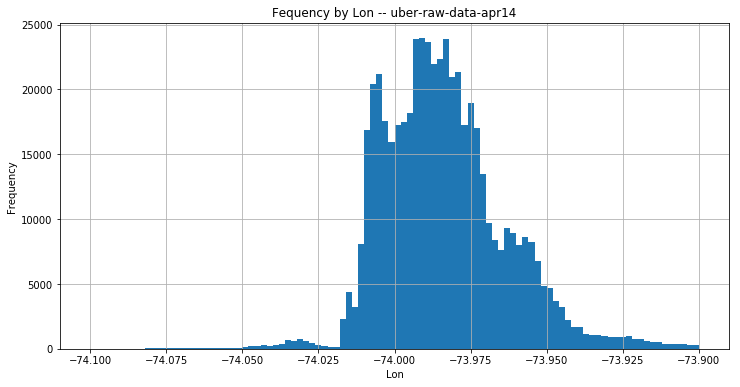

In [24]:
plt.figure(figsize=(12,6))
plt.hist(uber_apr.Lon, bins = 100, range = (-74.1, -73.9))
plt.xlabel("Lon")
plt.ylabel("Frequency")
plt.title("Fequency by Lon -- uber-raw-data-apr14")
plt.grid()
plt.show()

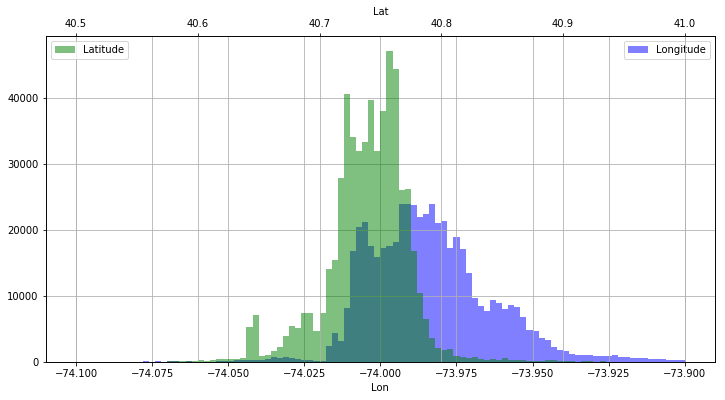

In [25]:
plt.figure(figsize=(12,6))
plt.hist(uber_apr.Lon, bins = 100, range = (-74.1, -73.9), color= "b", alpha = 0.5, label = "Longitude")
plt.xlabel("Lon")
plt.grid()
plt.legend(loc = "best")
plt.twiny()
plt.hist(uber_apr.Lat, bins = 100, range = (40.5, 41), color= "g", alpha = 0.5, label = "Latitude")
plt.xlabel("Lat")
plt.legend(loc = "upper left")
plt.grid()


(40.7, 41)

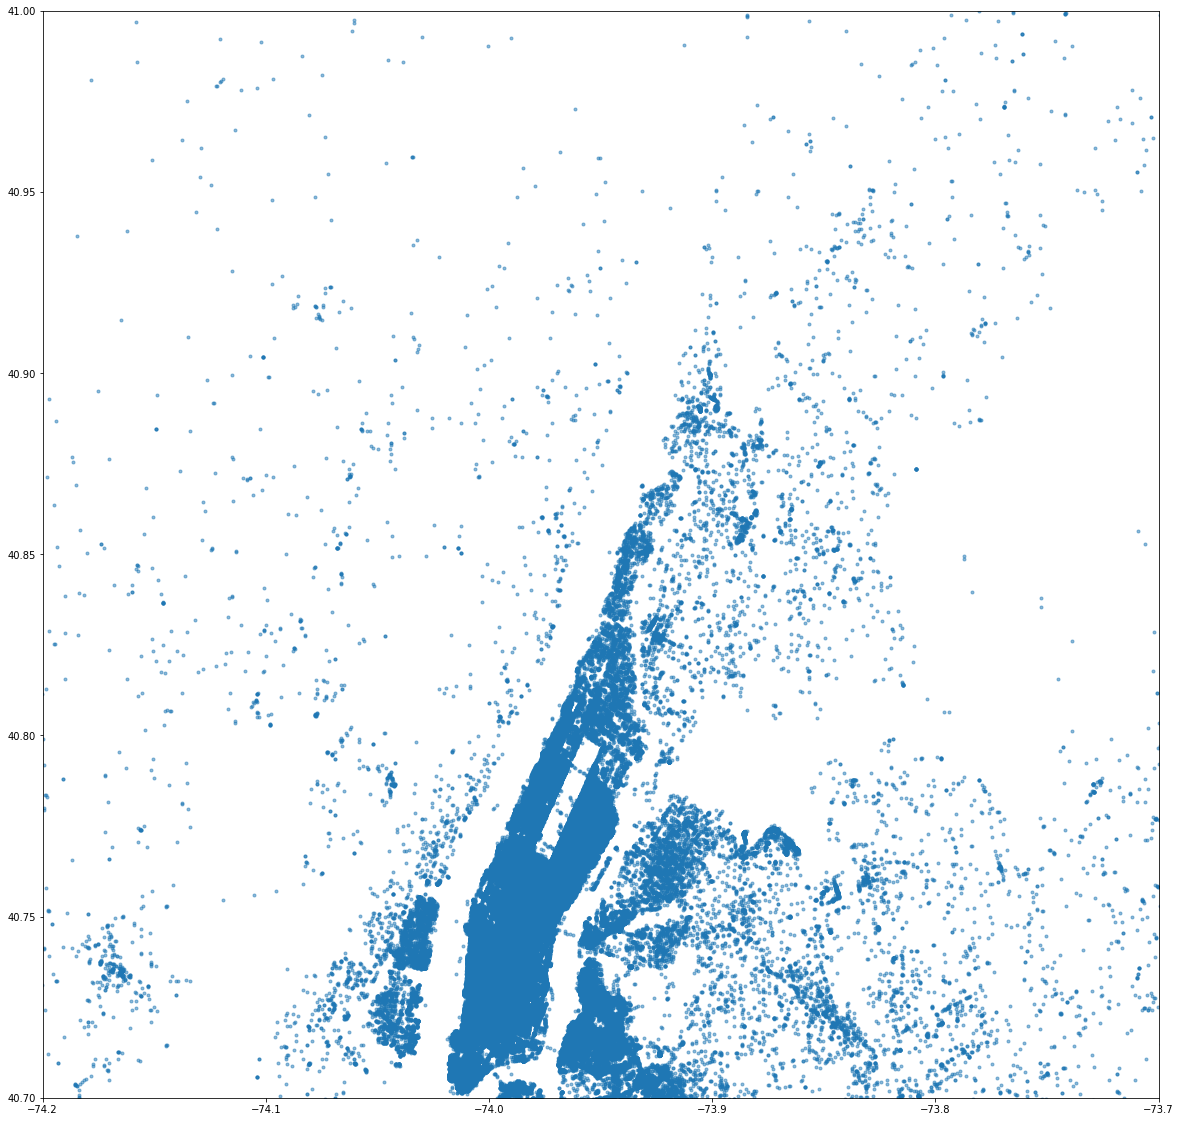

In [26]:
plt.figure(figsize=(20,20))
plt.plot(uber_apr.Lon, uber_apr.Lat, ".", alpha = 0.5 )
plt.xlim(-74.2, -73.7)
plt.ylim(40.7, 41)

In [27]:
df_cart = uber_apr[(uber_apr['Lat']<41) & (uber_apr['Lat']>40.7) & (uber_apr['Lon']<-73.7) & (uber_apr['Lon']>-74.2)]
df_cart.shape

(506908, 7)

In [0]:
cart = df_cart.sample(1000).loc[:, ["Lon", "Lat" ]]

In [29]:
cart.shape

(1000, 2)

In [0]:
cart_geo_coord = []
for i in range(len(cart)):
  LatLon = [(cart.Lat.iloc[i], cart.Lon.iloc[i])]
  cart_geo_coord.extend( LatLon if LatLon else ['NULL']) 


In [31]:
import folium
latlon = cart_geo_coord
mapit = folium.Map( location=[51.2, -0.13], zoom_start=6 )
for coord in latlon:
    folium.Marker( location=[ coord[0], coord[1] ]).add_to( mapit )
mapit

### 5- Kmeans

In [0]:
X = uber_apr.loc[:, ["Lon", "Lat", "dom", "weekday", "hour" ]]

In [33]:
X.head()

,Lon,Lat,dom,weekday,hour
0,-73.9549,40.7690,1,2,0
1,-74.0345,40.7267,1,2,0
2,-73.9873,40.7316,1,2,0
3,-73.9776,40.7588,1,2,0
4,-73.9722,40.7594,1,2,0


In [0]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

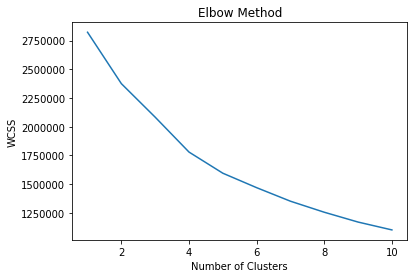

In [35]:
# Using the Elbow method to find the optimal number K of clusters
from sklearn.cluster import KMeans
wcss =  []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
X = uber_apr.loc[:, ["Lon", "Lat" ]]
kmeans = KMeans(n_clusters= 4, init= "k-means++", max_iter=300, n_init = 10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

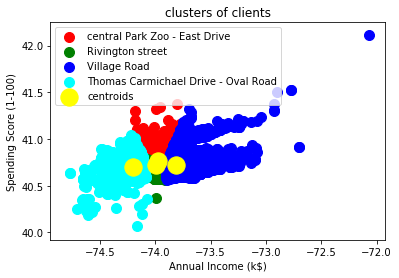

In [65]:
# Visualizing the clusters Sur Spending Score && Annual Income


plt.scatter(X.iloc[:, 0][y_kmeans == 0], X.iloc[:, 1][y_kmeans == 0], s = 100, c = 'red', label = 'central Park Zoo - East Drive ')
plt.scatter(X.iloc[:, 0][y_kmeans == 1], X.iloc[:, 1][y_kmeans == 1], s = 100, c = 'green', label = 'Rivington street')
plt.scatter(X.iloc[:, 0][y_kmeans == 2], X.iloc[:, 1][y_kmeans == 2], s = 100, c = 'blue', label = 'Village Road')
plt.scatter(X.iloc[:, 0][y_kmeans == 3], X.iloc[:, 1][y_kmeans == 3], s = 100, c = 'cyan', label = 'Thomas Carmichael Drive - Oval Road')
#plt.scatter(X.iloc[:, 1][y_kmeans == 4], X.iloc[:, 2][y_kmeans == 4], s = 100, c = 'magenta', label = 'Careless')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'centroids')
plt.title('clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [0]:
 df_centroids = pd.DataFrame(kmeans.cluster_centers_)

In [67]:
df_centroids

,0,1
0,-73.972458,40.766179
1,-73.992379,40.721378
2,-73.813014,40.717226
3,-74.201499,40.700467


In [0]:
centroids_coord = []
for i in range(len(df_centroids)):
  LatLon = [(df_centroids[1].iloc[i], df_centroids[0].iloc[i])]
  centroids_coord.extend( LatLon if LatLon else ['NULL']) 


In [69]:
centroids_coord

[(40.76617919417986, -73.97245756317253),
 (40.7213778223321, -73.99237876539236),
 (40.717226183089046, -73.813014100781),
 (40.70046739979445, -74.2014989311408)]

In [70]:
import folium
latlon = centroids_coord
mapit = folium.Map( location=[51.2, -0.13], zoom_start=6 )
for coord in latlon:
    folium.Marker( location=[ coord[0], coord[1] ]).add_to( mapit )
mapit

In [0]:
weekday_hour = uber_apr.loc[:, ["weekday", "hour" ]]
kmeans = KMeans(n_clusters= 4, init= "k-means++", max_iter=300, n_init = 10, random_state=0)
y_kmeans = kmeans.fit_predict(weekday_hour)

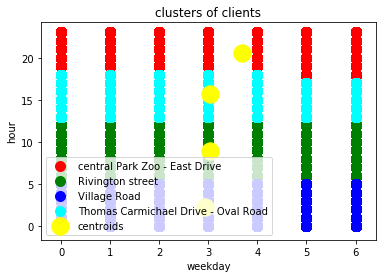

In [72]:
# Visualizing the clusters Sur Spending Score && Annual Income


plt.scatter(weekday_hour.iloc[:, 0][y_kmeans == 0], weekday_hour.iloc[:, 1][y_kmeans == 0], s = 100, c = 'red', label = 'central Park Zoo - East Drive')
plt.scatter(weekday_hour.iloc[:, 0][y_kmeans == 1], weekday_hour.iloc[:, 1][y_kmeans == 1], s = 100, c = 'green', label = 'Rivington street')
plt.scatter(weekday_hour.iloc[:, 0][y_kmeans == 2], weekday_hour.iloc[:, 1][y_kmeans == 2], s = 100, c = 'blue', label = 'Village Road')
plt.scatter(weekday_hour.iloc[:, 0][y_kmeans == 3], weekday_hour.iloc[:, 1][y_kmeans == 3], s = 100, c = 'cyan', label = 'Thomas Carmichael Drive - Oval Road')
#plt.scatter(X.iloc[:, 1][y_kmeans == 4], X.iloc[:, 2][y_kmeans == 4], s = 100, c = 'magenta', label = 'Careless')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'centroids')
plt.title('clusters of clients')
plt.xlabel('weekday')
plt.ylabel('hour')
plt.legend()
plt.show()